In [75]:
import pandas as pd 
import numpy as np 
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('modeling_ready.csv')
df.set_index('date',inplace=True)
df.head()

,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,unemployment_extension,ctatl_differicnced1
date,,,,,,,,,
2006-01-01,121900,113900,8000,6.5,1483,0,0,0,NaN
2006-02-01,122100,113800,8300,6.8,851,0,0,0,-632.0
2006-03-01,121900,114100,7800,6.4,335,0,0,0,-516.0
2006-04-01,122300,114600,7700,6.3,1053,0,0,0,718.0
2006-05-01,122900,115200,7600,6.2,2070,0,0,0,1017.0


In [5]:
df.drop('UR',axis=1,inplace=True)

In [6]:
df.head()

,Labor Force,Employed,Unemployed,ctotal,lockdown,e_stimulus,unemployment_extension,ctatl_differicnced1
date,,,,,,,,
2006-01-01,121900,113900,8000,1483,0,0,0,NaN
2006-02-01,122100,113800,8300,851,0,0,0,-632.0
2006-03-01,121900,114100,7800,335,0,0,0,-516.0
2006-04-01,122300,114600,7700,1053,0,0,0,718.0
2006-05-01,122900,115200,7600,2070,0,0,0,1017.0


In [7]:
mod=ARMA(df.ctatl_differicnced1.dropna(),order=(1,1,0))
result=mod.fit()
result.summary()



C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     ctatl_differicnced1   No. Observations:                  180
Model:                      ARMA(1, 1)   Log Likelihood               -1265.268
Method:                        css-mle   S.D. of innovations            270.694
Date:                 Sun, 11 Jul 2021   AIC                           2538.535
Time:                         14:35:54   BIC                           2551.307
Sample:                     02-01-2006   HQIC                          2543.713
                          - 01-01-2021                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.8011      1.373     -4.227      0.000      -8.491      -3.111
ar.L1.ctatl_differicnced1     0.7315      0.054     13.485      0.000       0.625       0.838
ma.L1.ctatl_differicnced1    -1.0000      0.016    -61.051      0.000      -1.032      -0.968
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3670           +0.0000j            1.3670            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

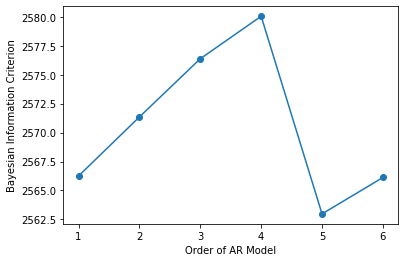

In [8]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(df.ctatl_differicnced1.dropna(), order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

it seems that the order for our model should be 4 

In [123]:

training= df.ctatl_differicnced1
X_train=training['2006-01-01':'2018-01-01']
X_test=training['2018-01-01':'2021-01-01']



In [95]:
#X_train,X_test=train_test_split(X,test_size=0.3)

In [155]:
model=ARMA(X_train.dropna(),order=(4,1,0))
model.fit()
preds=model.predict(X_test,start=165,end=180)

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

In [165]:
pred = preds

In [186]:
import math
math.log(pred+1)

TypeError: only size-1 arrays can be converted to Python scalars

In [168]:
plt.plot(np.squeeze(pred))

TypeError: 'tuple' object is not callable

In [169]:
import seaborn as sns; sns.set()

In [174]:
pt = sns.relplot(data = pred, kind= "line")

TypeError: 'tuple' object is not callable